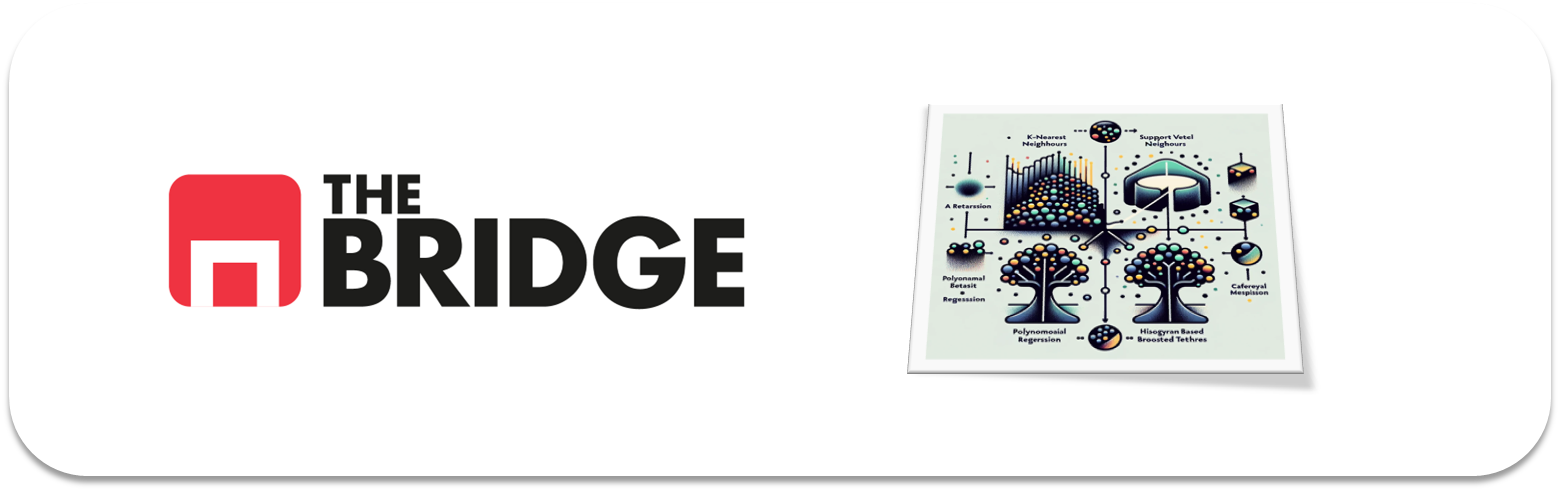

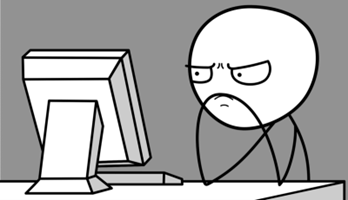

Para hacer un **repaso a los problemas de regresión con ML**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### INTRODUCCIóN: PROCESO DE ML

En los siguientes ejercicios vamos a seguir (de nuevo) los pasos básicos en la creación de un modelo de ML para resolver un problema de predicción a partir de un dataset que incluye el target, es decir, un aprendizaje supervisado.

En concreto, vamos a trabajar sobre un problema de clasificación a través de los siguientes pasos:

1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)  
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7)  
9. Evaluación contra test.  
10. Análisis de errores, posibles acciones futuras.  
11. EXTRA: Persistencia del modelo en disco.  

### El problema de Negocio

El ayuntamiento de Freehold, Nueva Jersey, está preocupado por los niveles de Ozono en situaciones de contaminación. Ha adquirido unos sensores muy potentes que permiten medir la composición de la calidad del aire casi en tiempo real, pero desgraciadamente la medida de Ozono se obtiene mucho más tarde (casi 12 horas después, este dato de las horas no es relevante para el problema). Las medidas son enviadas a una plataforma central donde se quiere incorporar un modelo que en función de esas medidas pueda predecir el nivel de $O_3$ (Ozono) en el aire y establecer alarmas y umbrales para avisar a la población o tomar medidas si es necesaria.

El concejal de urbanismo y tecnología, Bruce S., os contrata para que creéis ese modelo y para ello os suministra un dataset con medidas de la calidad de aire donde han incorporado el nivel de Ozono ("PT08.S5(O3)") posteriormente. Quieren un modelo que se equivoque en media en menos de 100 unidades por millón (la medida en la que tienen registrada la presencia de Ozono).

¡Manos a la obra!

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Librerias base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias Bootcamp (Data Science - The Bridge Oct24')
import bootcampviztools as bvt
import toolbox_ML as tml

# Semilla 42 para garantizar que los datos se mantengan
np.random.seed(42)

# Modelos de ML de regresión a utilizar en el notebook
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Herramientas de sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


### Ejercicio 1: Entendiendo el problema de "Negocio"

En función de la descripción del problema de "negocio" y sin mirar todavía los datos, ¿qué métricas creess más conveniente para medir el rendimiento del modelo a construir y, por tanto, para comparar posibles modelos entre sí?

- Es un problema supervisado de regresión

### Ejercicio 2: Obtención y primer "vistazo"

Carga el dataset, muestra sus primeras filas, su descripción general y determina el tipo de variables que vamos a manejar. Escoge el target y crea una variable `target` y asignalé el nombre de la columna correspondiente.

In [2]:
df = pd.read_csv("./data/air_contamination.csv")
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8991 entries, 0 to 8990
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         8991 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       8991 non-null   int64  
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        8991 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        8991 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 913.3 KB


In [4]:
tml.describe_df(df)

,Column Name,Data Type,Null Percentage (%),Unique Values,Cardinality (%)
0,CO(GT),float64,0.0,95,1.056612
1,PT08.S1(CO),float64,0.0,3245,36.091647
2,NMHC(GT),int64,0.0,428,4.760316
3,C6H6(GT),float64,0.0,3772,41.953064
4,PT08.S2(NMHC),float64,0.0,3772,41.953064
5,NOx(GT),float64,0.0,2362,26.270715
6,PT08.S3(NOx),float64,0.0,3518,39.128017
7,NO2(GT),float64,0.0,1367,15.204093
8,PT08.S4(NO2),float64,0.0,4407,49.015682
9,PT08.S5(O3),float64,0.0,4678,52.029808


In [5]:
tml.tipifica_variables(df,10,0.05)

,nombre_variable,tipo_sugerido
0,CO(GT),Numérica Discreta
1,PT08.S1(CO),Numérica Continua
2,NMHC(GT),Numérica Discreta
3,C6H6(GT),Numérica Continua
4,PT08.S2(NMHC),Numérica Continua
5,NOx(GT),Numérica Continua
6,PT08.S3(NOx),Numérica Continua
7,NO2(GT),Numérica Continua
8,PT08.S4(NO2),Numérica Continua
9,PT08.S5(O3),Numérica Continua


In [6]:
target = "PT08.S5(O3)"

### Ejercicio 3: Split

Haz el split en train y test.

In [7]:
train_set, test_set = train_test_split(df, test_size= 0.2)

X_train = train_set.drop(columns=target)
X_test = test_set.drop(columns=target)

y_train = train_set[target]
y_test = test_set[target]

### Ejercicio 4: MiniEDA (I)

Analiza la distribución del target brevemente.

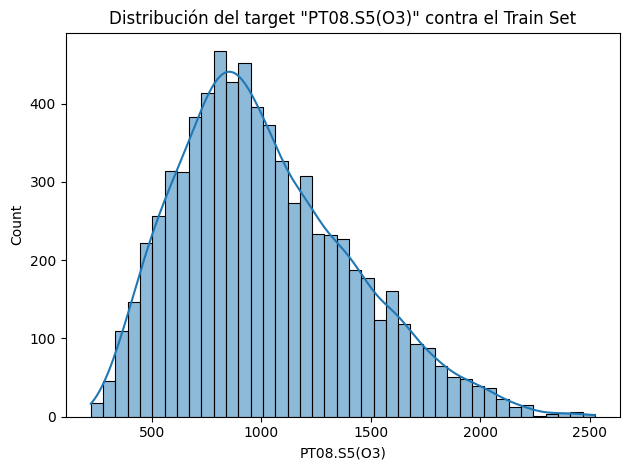

Podemos decir que la distribución tiende a la normalidad, aunque no por completo, pero se asemeja a


In [8]:
sns.histplot(train_set[target], kde=True)
plt.title('Distribución del target "PT08.S5(O3)" contra el Train Set')
plt.tight_layout()
plt.show()
print("Podemos decir que la distribución tiende a la normalidad, aunque no por completo, pero se asemeja a")

### Ejercicio 5: MiniEDA (II)

Analiza bivariantemente las variables contra el target, para las numéricas analiza la correlación numéricamente y gráficamente, para las categóricas analiza la distribución del target para cada valor de la categórica.

In [9]:
# Matriz de correlación entre las todas las features y el target
abs(X_train.corrwith(y_train, numeric_only=True)).sort_values(ascending=False)

PT08.S1(CO)      0.901005
PT08.S2(NMHC)    0.879959
C6H6(GT)         0.864269
PT08.S3(NOx)     0.794185
NOx(GT)          0.623100
PT08.S4(NO2)     0.590688
NO2(GT)          0.337581
RH               0.133955
CO(GT)           0.128110
NMHC(GT)         0.110077
AH               0.069113
T                0.032899
dtype: float64

In [10]:
# Calcular la matriz de correlación entre las features
feature_corr = X_train.corr()

# Filtrar las correlaciones absolutas entre 0.8 y 1 o entre -0.8 y -1
selected_features = feature_corr[
    (feature_corr.abs() >= 0.8) & (feature_corr.abs() <= 1)
].stack().reset_index()

# Renombrar columnas para claridad
selected_features.columns = ['Feature1', 'Feature2', 'Correlation']

# Eliminar duplicados y valores de la diagonal principal (correlación con sí misma)
selected_features = selected_features[
    (selected_features['Feature1'] != selected_features['Feature2'])
].drop_duplicates(subset=['Correlation'])

# Mostrar las correlaciones seleccionadas
selected_features

,Feature1,Feature2,Correlation
2,PT08.S1(CO),C6H6(GT),0.884962
3,PT08.S1(CO),PT08.S2(NMHC),0.893618
7,C6H6(GT),PT08.S2(NMHC),0.981825
12,NOx(GT),NO2(GT),0.821307


In [11]:
features_alta_corr = tml.seleccionar_features(train_set, target, umbral_correlacion_entre_features = 0.9)
print("Features seleccionadas:", features_alta_corr)

Features seleccionadas: ['PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']


In [12]:
features_baja_corr = tml.seleccionar_features(train_set, target, umbral_correlacion_entre_features = 0.7)
print("Features seleccionadas:", features_baja_corr)

Features seleccionadas: ['PT08.S1(CO)', 'NOx(GT)', 'PT08.S4(NO2)']


### Ejercicio 6: MiniEDA (III)

Crea una variable de tipo lista a la que asignes los valores de las columnas que creas conveniente emplear como features en función de lo visto en el miniEDA. Haz una lista de modelos/algoritmos que vas a emplear para hacer el modelo (solo los nombres). En función de la lista anterior, ¿tienes que tratar las variables, por qué?

In [13]:
features = X_train.columns.to_list() # Conjunto de todas las features del data set
print(features)
print(features_alta_corr) # Conjunto de features con una alta correlación entre ellas 
print(features_baja_corr) # Conjunto de features con una baja correlación entre ellas 

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH']
['PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']
['PT08.S1(CO)', 'NOx(GT)', 'PT08.S4(NO2)']


### Ejercicio 7: Tratamiento de features

Trata las features de manera que puedan ser empleadas por los modelos que escogite en el ejercicio anterior. Recuerda que este es un paso necesario porque los modelos no entienden de primeras de "letras" (salvo alguno que no es que entienda sino que hace sus transformaciones por dentro) y porque en determinados algoritmos es necesario que los rangos de las features estén escalados para que el algoritmo no se decante (érroneamente) por alguna feature sólo porque sus valores son mayores en rango que el de otras. NOTA: Recuerda que lo que le hagas al train, se lo tienes que hacer al test

- No instanciaré ningún modelo sensible a la escala, por lo que no tengo que escalar/transformar las features

### Ejercicio 8: Creación de los dataset de train y test

Crea las parejas X,y de train y test.

In [14]:
# Crear las listas X_train, X_test según las nuevas categorías

# TRAIN SET
X_train_alta_corr = train_set[features_alta_corr]  # Características con alta correlación
X_train_baja_corr = train_set[features_baja_corr]  # Características con baja correlación
X_train_all = train_set[features]  # Conjunto de todas las features

y_train = train_set[target]  # Target

# TEST SET
X_test_alta_corr = test_set[features_alta_corr]  # Características con alta correlación
X_test_baja_corr = test_set[features_baja_corr]  # Características con baja correlación
X_test_all = test_set[features]  # Conjunto de todas las features

y_test = test_set[target]  # Target


### Ejercicios 9:

Importa e instancia los modelos que hayas escogido en el ejercicio 6. En general, no hace falta que asignes ahora ningún hiperparámetro salvo en los basados en árboles en los que debes escoger un max_depth para evitar el sobreajuste inicial. 

In [15]:
rf_reg = RandomForestRegressor(max_depth = 15) 
xgb_reg = XGBRegressor(max_depth = 15)
lgb_reg = LGBMRegressor(max_depth = 15, verbose = -100)

modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}

### Ejercicio 10: Comparativa de modelos

Haz la comparativa de modelos empleando cross_val_score (es decir la validación cruzada). Utiliza k = 5, y un scoring acorde a la métrica escogida en el ejercicio 1. Si no tienes clara la métrica entonces emplea "mean_absolute_error" (recuerda el funcionamiento del scoring en "sklearn", no te valdrá poner "mean_absolute_error"). Escoge el modelo ganador.

In [16]:
# Definir la métrica de evaluación
scoring_func = "neg_mean_absolute_error"  # Negativo porque cross_val_score busca maximizar el score

# Diccionario para almacenar los mejores resultados
resultados = {}

# Conjuntos de features
feature_sets = {
    "Alta correlación": (X_train_alta_corr),
    "Baja correlación": (X_train_baja_corr),
    "Todas las features": (X_train_all)
}

# Modelos
modelos = {
    "Random Forest": rf_reg,
    "Lightgbm": lgb_reg,
    "XGBoost": xgb_reg
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\nModelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, X_train in feature_sets.items():
        # Validación cruzada con 5 folds
        scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring=scoring_func)
        mae_medio = -np.mean(scores)  # Se multiplica por -1 porque 'neg_mean_absolute_error' devuelve valores negativos

        mejores_resultados[nombre_feat] = mae_medio
        print(f"  {nombre_feat}: MAE Medio = {mae_medio:.4f}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = min(mejores_resultados, key=mejores_resultados.get)
    resultados[nombre_modelo] = (mejor_feature_set, mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (MAE) por modelo:")
for modelo, (feat_set, score) in resultados.items():
    print(f"{modelo}: {feat_set} con MAE = {score:.4f}")



Modelo: Random Forest
  Alta correlación: MAE Medio = 94.3032
  Baja correlación: MAE Medio = 108.6044
  Todas las features: MAE Medio = 78.8872

Modelo: Lightgbm
  Alta correlación: MAE Medio = 96.0834
  Baja correlación: MAE Medio = 106.9007
  Todas las features: MAE Medio = 78.3146

Modelo: XGBoost
  Alta correlación: MAE Medio = 99.0505
  Baja correlación: MAE Medio = 119.5520
  Todas las features: MAE Medio = 81.4892

🏆 Mejor score (MAE) por modelo:
Random Forest: Todas las features con MAE = 78.8872
Lightgbm: Todas las features con MAE = 78.3146
XGBoost: Todas las features con MAE = 81.4892


### Ejercicio 11: Ajuste de hiperparámetros

Escoge un grid para ajustar los hiperparámetros de tu modelo. Crea un objeto GridSearch y "ajustalo" (emplea su método fit) para encontrar la mejor combinaciónde hiperparámetros empleando la métrica que decidimos en el ejercio 1. Si no lo tienes claro emplea "mean absolute error". 

In [17]:
# Definir la métrica de evaluación
scoring_func = "neg_mean_absolute_error"  # Se usa error absoluto medio negativo para regresión

# Diccionario para almacenar los mejores resultados
resultados = {}

# Hiperparámetros para cada modelo
param_grid = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 10, None],
    },
    "Lightgbm": {
        "num_leaves": [10, 20, 30],
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [50, 100, 200],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
        "n_estimators": [50, 100, 200],
    }
}

# Conjuntos de features
feature_sets = {
    "Todas las features": (X_train_all),
    "Características alta correlación": (X_train_alta_corr),
    "Características baja correlación": (X_train_baja_corr),
}

# Evaluar cada modelo con cada conjunto de features
for nombre_modelo, modelo in modelos.items():
    print(f"\n🔍 Ajustando modelo: {nombre_modelo}")
    mejores_resultados = {}

    for nombre_feat, X_train in feature_sets.items():
        # GridSearchCV para encontrar los mejores hiperparámetros
        grid_search = GridSearchCV(
            modelo,
            param_grid[nombre_modelo],
            cv=5,
            scoring=scoring_func,
            n_jobs=-1
        )

        grid_search.fit(X_train, y_train)
        best_score = -1*(grid_search.best_score_)
        best_params = grid_search.best_params_

        mejores_resultados[nombre_feat] = (best_score, best_params)
        print(f"  {nombre_feat}: Mejor MAE = {best_score:.4f}, Hiperparámetros = {best_params}")

    # Guardamos el mejor resultado del modelo
    mejor_feature_set = min(mejores_resultados, key=lambda k: mejores_resultados[k][0])
    resultados[nombre_modelo] = (mejor_feature_set, *mejores_resultados[mejor_feature_set])

# Mostrar el mejor resultado por modelo
print("\n🏆 Mejor score (MAE) por modelo optimizado:")
for modelo, (feat_set, score, params) in resultados.items():
    print(f"{modelo}: {feat_set} con MAE = {score:.4f}, Hiperparámetros óptimos: {params}")



🔍 Ajustando modelo: Random Forest
  Todas las features: Mejor MAE = 78.2484, Hiperparámetros = {'max_depth': None, 'n_estimators': 200}
  Características alta correlación: Mejor MAE = 93.4176, Hiperparámetros = {'max_depth': None, 'n_estimators': 200}
  Características baja correlación: Mejor MAE = 106.9742, Hiperparámetros = {'max_depth': 10, 'n_estimators': 200}

🔍 Ajustando modelo: Lightgbm
  Todas las features: Mejor MAE = 76.1121, Hiperparámetros = {'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 30}
  Características alta correlación: Mejor MAE = 94.8317, Hiperparámetros = {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 30}
  Características baja correlación: Mejor MAE = 106.8146, Hiperparámetros = {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 10}

🔍 Ajustando modelo: XGBoost
  Todas las features: Mejor MAE = 75.7194, Hiperparámetros = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
  Características alta correlación: Mejor MAE = 94.954

### Ejercicio 12: Evaluación del modelo

Evalúa el modelo contra el dataset de test. Muestra el informe de clasificación y haz una valoración de si el hospital aceptaría el modelo o no.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Conjunto de características optimizado y mejor modelo para cada tipo
modelos_optimizados = {
    "Random Forest": RandomForestRegressor(max_depth=None, n_estimators=200),
    "Lightgbm": LGBMRegressor(learning_rate=0.2, n_estimators=200, num_leaves=30),
    "XGBoost": XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=200),
}

# Evaluar el modelo contra el conjunto de test
for nombre_modelo, modelo in modelos_optimizados.items():
    print(f"\nEvaluando {nombre_modelo} con el conjunto de test...")
    modelo.fit(X_train_all, y_train)  # Ajustamos el modelo con los mejores hiperparámetros
    y_pred = modelo.predict(X_test_all)  # Realizamos las predicciones

    # Calcular el MAE en el conjunto de test
    mae_test = mean_absolute_error(y_test, y_pred)
    print(f"  MAE en test: {mae_test:.4f}")
    
    # Calcular el RMSE en el conjunto de test
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"  RMSE en test: {rmse_test:.4f}")
    
    # Valoración con base en el MAE
    if mae_test <= 100:  # Umbral de aceptación para el problema del ayuntamiento
        print(f"\n🎉 El ayuntamiento de Freehold aceptaría el modelo {nombre_modelo}, ya que el MAE es suficientemente bajo (<= 100).")
    else:
        print(f"\n🚫 El ayuntamiento de Freehold no aceptaría el modelo {nombre_modelo}, ya que el MAE es demasiado alto (> 100).")

    # Valoración con base en el RMSE
    if rmse_test <= 100:  # Umbral de aceptación para el RMSE (si se aplica este criterio también)
        print(f"🎉 El RMSE del modelo {nombre_modelo} es suficientemente bajo (<= 100).")
    else:
        print(f"🚫 El RMSE del modelo {nombre_modelo} es demasiado alto (> 100).")



Evaluando Random Forest con el conjunto de test...
  MAE en test: 77.3572
  RMSE en test: 107.2932

🎉 El ayuntamiento de Freehold aceptaría el modelo Random Forest, ya que el MAE es suficientemente bajo (<= 100).
🚫 El RMSE del modelo Random Forest es demasiado alto (> 100).

Evaluando Lightgbm con el conjunto de test...
  MAE en test: 73.5521
  RMSE en test: 102.8069

🎉 El ayuntamiento de Freehold aceptaría el modelo Lightgbm, ya que el MAE es suficientemente bajo (<= 100).
🚫 El RMSE del modelo Lightgbm es demasiado alto (> 100).

Evaluando XGBoost con el conjunto de test...
  MAE en test: 72.6901
  RMSE en test: 101.8392

🎉 El ayuntamiento de Freehold aceptaría el modelo XGBoost, ya que el MAE es suficientemente bajo (<= 100).
🚫 El RMSE del modelo XGBoost es demasiado alto (> 100).


### Ejercicio 13: Análisis de errores

Comparar los valores predichos contra los reales mediante una gráfica (puedes emplear la función que empleamos en el workout de la unidad anterior). Haz un pequeño análisis.

In [22]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

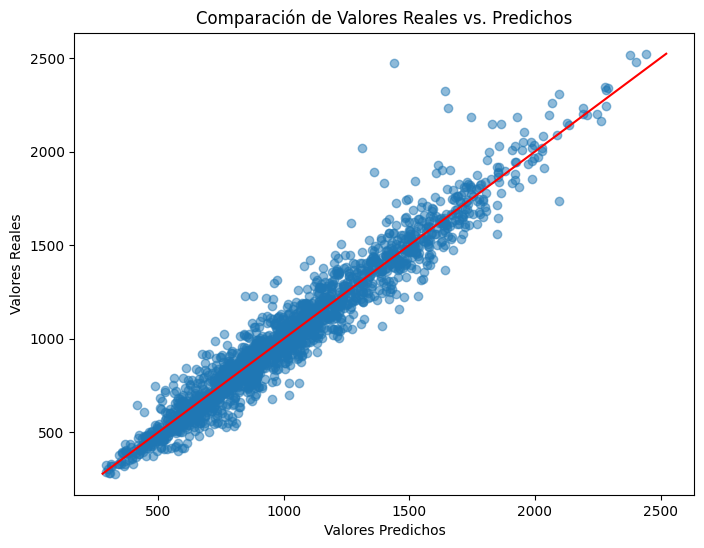

En general hay poco error en el modelo


In [26]:
# Definir y entrenar el modelo XGBoost
modelo = XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=200)
modelo.fit(X_train_all, y_train)  # Ajustar el modelo con el conjunto de entrenamiento

# Realizar las predicciones en el conjunto de test
y_pred = modelo.predict(X_test_all)

# Luego, puedes graficar las predicciones frente a los valores reales
plot_predictions_vs_actual(y_test, y_pred)
print("En general hay poco error en el modelo")

### EXTRA: 

Busca en Internet o pregúntale a tu AI preferida, cómo se graba un modelo en disco y gúardalo en "./models/o3_pred" con la extesión apropiada.